# 1. Introduction, Visualisation of Data

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from keras import optimizers



In [2]:
data = pd.read_csv("/kaggle/input/reliance-stock-price-dataset/reliance_data.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,01-01-1996,RELIANCE,EQ,204.65,205.00,206.10,203.65,NaN,205.75,205.26,3717450,7.630000e+13,NaN,NaN,NaN
1,02-01-1996,RELIANCE,EQ,205.75,205.25,206.25,202.65,NaN,204.15,204.13,6024650,1.230000e+14,NaN,NaN,NaN
2,03-01-1996,RELIANCE,EQ,204.15,207.50,216.95,205.25,NaN,205.70,207.04,7473500,1.550000e+14,NaN,NaN,NaN
3,04-01-1996,RELIANCE,EQ,205.70,203.75,204.40,201.05,NaN,203.80,202.47,7744000,1.570000e+14,NaN,NaN,NaN
4,05-01-1996,RELIANCE,EQ,203.80,203.00,203.00,200.65,NaN,202.40,202.05,5952000,1.200000e+14,NaN,NaN,NaN


<p style="font-size:16px"> Plotting candlesticks for a given year

In [7]:
candlestick = go.Candlestick(
                            x=df.index,
                            open=df['Open'],
                            high=df['High'],
                            low=df['Low'],
                            close=df['Close']
                            )
fig = go.Figure(data=[candlestick])

fig.update_layout(
    width=1200, height=600,
    title="Reliance, 2020",
    yaxis_title='Price'
)

fig.show()

<p style="font-size:16px"> Visualize the closing price <\p>

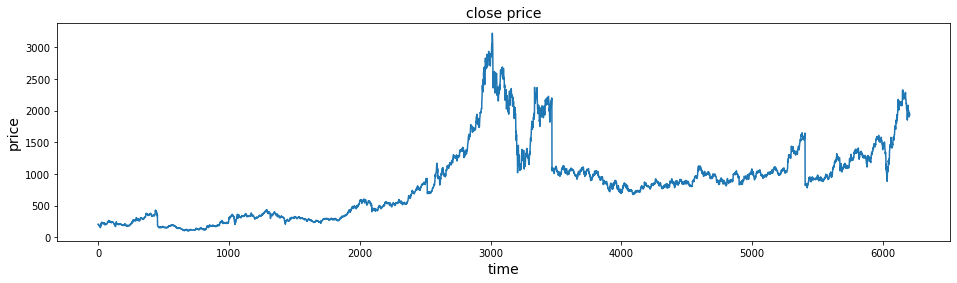

In [8]:
plt.figure(figsize=(16,4));
plt.title('close price',fontsize=14);
plt.plot(data.Close);
plt.xlabel('time',fontsize=14);
plt.ylabel('price',fontsize=14);

In [9]:
data.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
6200,2020-11-23,RELIANCE,EQ,1899.50,1951.00,1970.00,1926.25,1955.20,1950.70,1952.18,20918665,4.083700e+15,497781.0,5148955.0,0.2461
6201,2020-11-24,RELIANCE,EQ,1950.70,1964.00,1974.00,1932.00,1971.05,1964.05,1952.11,14277083,2.787040e+15,362587.0,3213843.0,0.2251
6202,2020-11-25,RELIANCE,EQ,1964.05,1980.00,1992.95,1942.20,1947.50,1947.80,1969.06,15062376,2.965870e+15,356793.0,3040444.0,0.2019
6203,2020-11-26,RELIANCE,EQ,1947.80,1953.05,1965.00,1930.05,1957.00,1952.60,1946.67,11924527,2.321310e+15,266412.0,3406506.0,0.2857
6204,2020-11-27,RELIANCE,EQ,1952.60,1940.50,1956.10,1921.40,1940.50,1929.80,1935.45,21845931,4.228160e+15,314085.0,12489338.0,0.5717


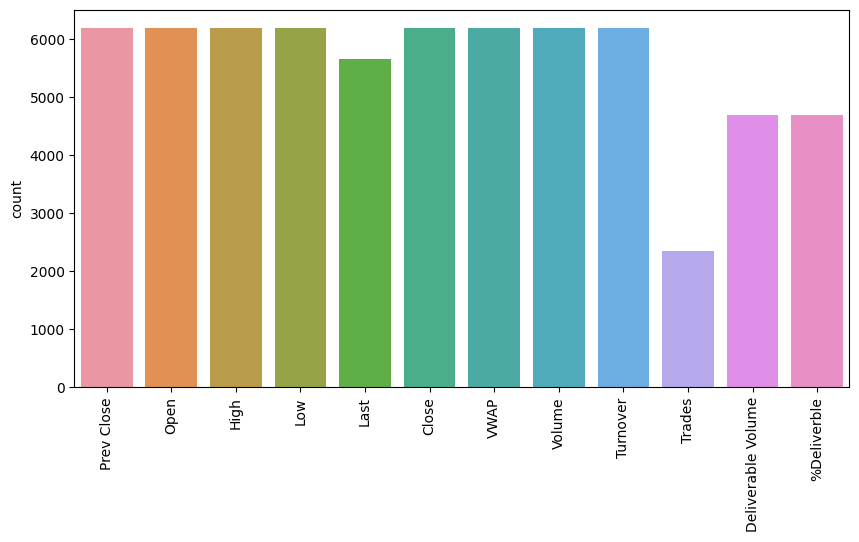

In [10]:
fig1, ax = plt.subplots(1,1,figsize=(10,5),dpi=100)
sns.countplot(data=data,ax=ax)
ax.tick_params(axis='x', rotation=90)

Lets drop columns with incomplete information

In [11]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [12]:
data = data.drop(columns=['Symbol', 'Series', 'Last', 'Trades', 'Deliverable Volume','%Deliverble'], axis=1);

In [13]:
data = data[['Date','Prev Close','Open', 'High', 'Low', 'VWAP','Volume', 'Turnover','Close']];

In [14]:
data.head()

,Date,Prev Close,Open,High,Low,VWAP,Volume,Turnover,Close
0,1996-01-01,204.65,205.00,206.10,203.65,205.26,3717450,7.630000e+13,205.75
1,1996-02-01,205.75,205.25,206.25,202.65,204.13,6024650,1.230000e+14,204.15
2,1996-03-01,204.15,207.50,216.95,205.25,207.04,7473500,1.550000e+14,205.70
3,1996-04-01,205.70,203.75,204.40,201.05,202.47,7744000,1.570000e+14,203.80
4,1996-05-01,203.80,203.00,203.00,200.65,202.05,5952000,1.200000e+14,202.40


In [15]:
data.loc[5975,:]

Date          2020-01-01 00:00:00
Prev Close                1514.05
Open                       1518.0
High                       1527.1
Low                        1505.5
VWAP                      1515.23
Volume                    6402372
Turnover        970000000000000.0
Close                      1509.6
Name: 5975, dtype: object

In [16]:
data.loc[5974,:]

Date          2019-12-31 00:00:00
Prev Close                 1544.2
Open                       1542.0
High                       1543.7
Low                       1508.05
VWAP                      1525.14
Volume                   10150467
Turnover       1550000000000000.0
Close                     1514.05
Name: 5974, dtype: object

In [17]:
data = data.drop(columns=['Date'], axis=1);

In [18]:
data.info

<bound method DataFrame.info of       Prev Close     Open     High      Low     VWAP    Volume      Turnover  \
0         204.65   205.00   206.10   203.65   205.26   3717450  7.630000e+13   
1         205.75   205.25   206.25   202.65   204.13   6024650  1.230000e+14   
2         204.15   207.50   216.95   205.25   207.04   7473500  1.550000e+14   
3         205.70   203.75   204.40   201.05   202.47   7744000  1.570000e+14   
4         203.80   203.00   203.00   200.65   202.05   5952000  1.200000e+14   
...          ...      ...      ...      ...      ...       ...           ...   
6200     1899.50  1951.00  1970.00  1926.25  1952.18  20918665  4.083700e+15   
6201     1950.70  1964.00  1974.00  1932.00  1952.11  14277083  2.787040e+15   
6202     1964.05  1980.00  1992.95  1942.20  1969.06  15062376  2.965870e+15   
6203     1947.80  1953.05  1965.00  1930.05  1946.67  11924527  2.321310e+15   
6204     1952.60  1940.50  1956.10  1921.40  1935.45  21845931  4.228160e+15   

       

<a id="4"></a>
# 2. Time Series Forecasting

<p style="font-size:16px"> Lets use Long Short Term Memory (LSTM) to forecast the closing price of a stock. LSTM is widely used method for time-series forecasting. This nueral network stores past information that are important while forgetting other information that are not so important. <\p>

<a id="5"></a>
### 2.1 Scaling and data leakage

<p style="font-size:16px"> We will first scale the data treating them separately as train and test. For train we will use data
    until 2019 and for the test we will use 2020 stock price. <\p>

In [19]:
# Scale the dataset
scaler = MinMaxScaler(feature_range=(0,1));
dataset = data.values.astype('float32')

In [20]:
dataset.shape

(6205, 8)

In [21]:
#  Perform separate scaling for training and testing data set to avoid DATA LEAKAGE

scaled1 = scaler.fit_transform(dataset[0:5974,:]); # Years until 2019
scaled2 = scaler.fit_transform(dataset[5974:6205,:]); # Year 2020


In [22]:
scaled1.shape

(5974, 8)

In [23]:
scaled2.shape

(231, 8)

In [24]:
scaled  = np.concatenate((scaled1, scaled2), axis=0);


In [25]:
scaled.shape

(6205, 8)

In [26]:
X_train = scaled[0:5974,0:-1]; # Years until 2019
X_train.shape

(5974, 7)

In [27]:
X_test = scaled[5974:-1,0:-1]; # Year 2020
X_test.shape

(230, 7)

In [28]:
Y_train = scaled[0:5974,-1];  # Years until 2019
Y_true  = scaled[5974:-1,-1]; # Year 2020

In [29]:
Y_train.shape,Y_true.shape

((5974,), (230,))

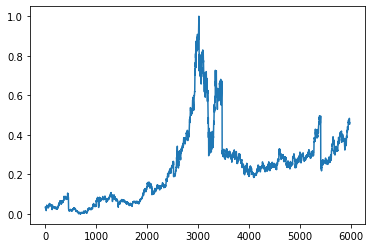

In [30]:
plt.plot(Y_train) # scaled version of price action till 2019

In [31]:
# Reshape the data
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1));
X_train.shape

(5974, 7, 1)

In [32]:
X_test = np.array(X_test);
# Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1));
X_test.shape

(230, 7, 1)

<a id="6"></a>
### 2.2 LSTM Model

In [33]:

# build the LSTM Model
LSTM_model = Sequential();
LSTM_model.add(LSTM(units = 50,return_sequences=True,input_shape = (X_train.shape[0],1)));
LSTM_model.add(LSTM(units = 50,return_sequences=False));
LSTM_model.add(Dense(25,activation='sigmoid')); # hidden layer
LSTM_model.add(Dropout(0.2));
LSTM_model.add(Dense(1,activation='sigmoid')); # output layer


2022-12-11 15:09:10.794904: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [34]:
LSTM_model.compile(loss = 'mean_squared_error',optimizer = 'adam');


2022-12-11 15:09:11.632802: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
598/598 [==============================] - 14s 15ms/step - loss: 0.0056 - val_loss: 0.0059
Epoch 2/5
598/598 [==============================] - 8s 14ms/step - loss: 0.0011 - val_loss: 0.0036
Epoch 3/5
598/598 [==============================] - 8s 13ms/step - loss: 8.3088e-04 - val_loss: 0.0023
Epoch 4/5
598/598 [==============================] - 8s 13ms/step - loss: 6.6140e-04 - val_loss: 0.0023
Epoch 5/5
598/598 [==============================] - 8s 14ms/step - loss: 6.0684e-04 - val_loss: 0.0018


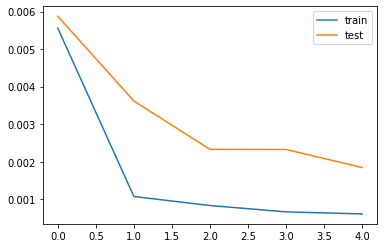

In [35]:
history = LSTM_model.fit(X_train,Y_train,batch_size = 10,epochs = 5,validation_data=(X_test, Y_true));
plt.plot(history.history['loss'],label='train');
plt.plot(history.history['val_loss'],label='test');
plt.legend();

In [36]:
y_pred   = LSTM_model.predict(X_test);


In [37]:
X_test   = X_test.reshape(X_test.shape[0],X_test.shape[1]);
datafwd  = np.concatenate((X_test, y_pred), axis=1);
inv_data = scaler.inverse_transform(datafwd);
ypred    = inv_data[:,-1];

<a id="7"></a>
# 3. Results

<p style="font-size:16px"> Here we will visualize the predicted stock price for 2020 against the ground truth. <\p>

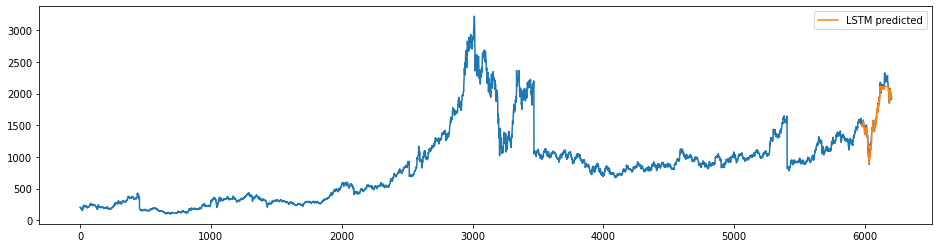

In [38]:
plt.figure(figsize=(16,4));
plt.plot(data.Close);
index_2020 = list(range(5974,6204));
plt.plot(index_2020,ypred,label='LSTM predicted');
plt.legend();

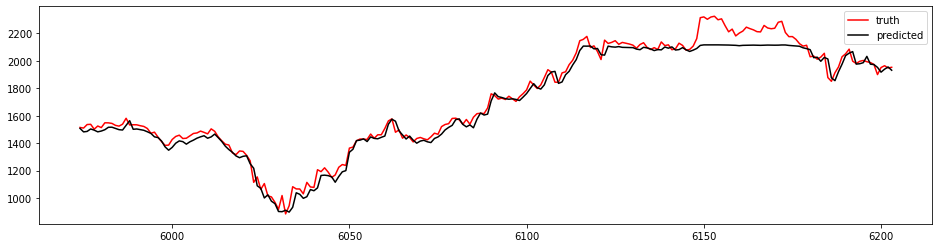

In [39]:
plt.figure(figsize=(16,4));
plt.plot(data.Close[5974:6204],'r',label='truth');
index_2020 = list(range(5974,6204));
plt.plot(index_2020,ypred,'k',label='predicted');
plt.legend()